# Visualising time trends using animation and interactive streams

### This week's exercise tests your abilities in the following:

 - Preparing your data for animation
 - Animating your charts
 - Making the chart more attractive and memorable.

 - Using stream charts interactively

## 1. Preliminary work
 - Load your libraries.  You'll need tidyverse.  Others can be added later.
 - If there are libraries you like for aesthetics, add them too.

In [1]:
install.packages("tweenr")
# install.packages("gganimate")
library(devtools)
devtools::install_github("dgrtwo/gganimate")
devtools::install_github("hrbrmstr/streamgraph")

package 'tweenr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tweenr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\lukeh\anaconda3\envs\Visdata\Lib\R\library\00LOCK\tweenr\libs\x64\tweenr.dll to C:\Users\lukeh\anaconda3\envs\Visdata\Lib\R\library\tweenr\libs\x64\tweenr.dll: Permission denied"
Warning message:
"restored 'tweenr'"



The downloaded binary packages are in
	C:\Users\lukeh\AppData\Local\Temp\RtmpsfTgBQ\downloaded_packages


Loading required package: usethis

Skipping install of 'gganimate' from a github remote, the SHA1 (7cd46dc2) has not changed since last install.
  Use `force = TRUE` to force installation

Skipping install of 'streamgraph' from a github remote, the SHA1 (76f7173e) has not changed since last install.
  Use `force = TRUE` to force installation



In [2]:
library(tidyverse)
library(gganimate)
library(streamgraph)
library(ggplot2)


-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.1      v purrr   1.0.1 
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.3.0      v stringr 1.5.0 
v readr   2.1.3      v forcats 0.5.2 
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
No renderer backend detected. gganimate will default to writing frames to separate files
Consider installing:
- the `gifski` package for gif output
- the `av` package for video output
and restarting the R session



## 2. Source your data

The Irish Weather monitoring service, Met Eireann, publishes data that has been collected at weather stations over the years.  The data recorded can be hourly, daily or monthly.  Let's focus on monthly data this time around.

 - Go to https://data.gov.ie/organization/meteireann.  In the search box, look for monthly data.  Pick a weather station, first checking that there is valid data there.  
 - Read the data into a dataframe.
 - Remember that some of the datasets start with comments (see sample code, week 3).
 - Make sure that the dataset you choose has month and year values (or dates, that you can convert to month and year) and that every row has a value for month and year.

In [3]:
# Set the working directory to where the CSV file is located
setwd("C:/Users/lukeh/Documents/College/4th-Year/Visualising_Data")

# Load the CSV file into a data frame
data <- read.csv("mly2615.csv")

# View the first few rows of the data frame
head(data)

,year,month,ind,rain,gdf,rd,wd
,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,1956,1,8,NA,NA,NA,NA
2,1956,2,8,NA,NA,NA,NA
3,1956,3,8,NA,NA,NA,NA
4,1956,4,8,NA,NA,NA,NA
5,1956,5,8,NA,NA,NA,NA
6,1956,6,8,NA,NA,NA,NA


## 3. Check out your data:
 - What is the structure? (str)
 - Check the summary - what is the range of each value?  Are there many NAs?
 - How many unique values are there for each variable?
     - df %>% summarise_all(n_distinct)
 - Is there any column that only has a few values, so could be used for small multiples or stacking?
 - Are there columns that have more or less the same range of values?  Maybe that could be pivoted and used for stacking?
 - Is there any column you could use to change the size in a point chart?

In [4]:
str(data)

'data.frame':	627 obs. of  7 variables:
 $ year : int  1956 1956 1956 1956 1956 1956 1956 1956 1956 1956 ...
 $ month: int  1 2 3 4 5 6 7 8 9 10 ...
 $ ind  : int  8 8 8 8 8 8 8 8 8 8 ...
 $ rain : num  NA NA NA NA NA NA NA NA NA NA ...
 $ gdf  : num  NA NA NA NA NA NA NA NA NA NA ...
 $ rd   : int  NA NA NA NA NA NA NA NA NA NA ...
 $ wd   : int  NA NA NA NA NA NA NA NA NA NA ...


In [5]:
data %>% summarise_all(n_distinct)

year,month,ind,rain,gdf,rd,wd
<int>,<int>,<int>,<int>,<int>,<int>,<int>
53,12,3,502,289,28,26


## 4. Start charting
- If you need to summarise, to get one row per month, do that now.
- Do a preliminary chart, limited to a single year. Keep it as simple as possible for the moment.  A geom_line chart is fine to start with, but to transition through time, it must be a geom_point chart.
- For your second chart, add in colour and size parameters.

In [6]:
# Set the plot dimensions
options(repr.plot.width=15, repr.plot.height=8)

In [7]:
# Aggregate the data by month to get the total rainfall
summarized_data <- aggregate(rain ~ month, data, sum)

# Print the summarized data
print(summarized_data)

   month   rain
1      1 4883.6
2      2 3548.9
3      3 3442.3
4      4 3008.3
5      5 2903.3
6      6 2673.6
7      7 2734.9
8      8 3516.8
9      9 4010.2
10    10 5180.7
11    11 5169.6
12    12 5084.6


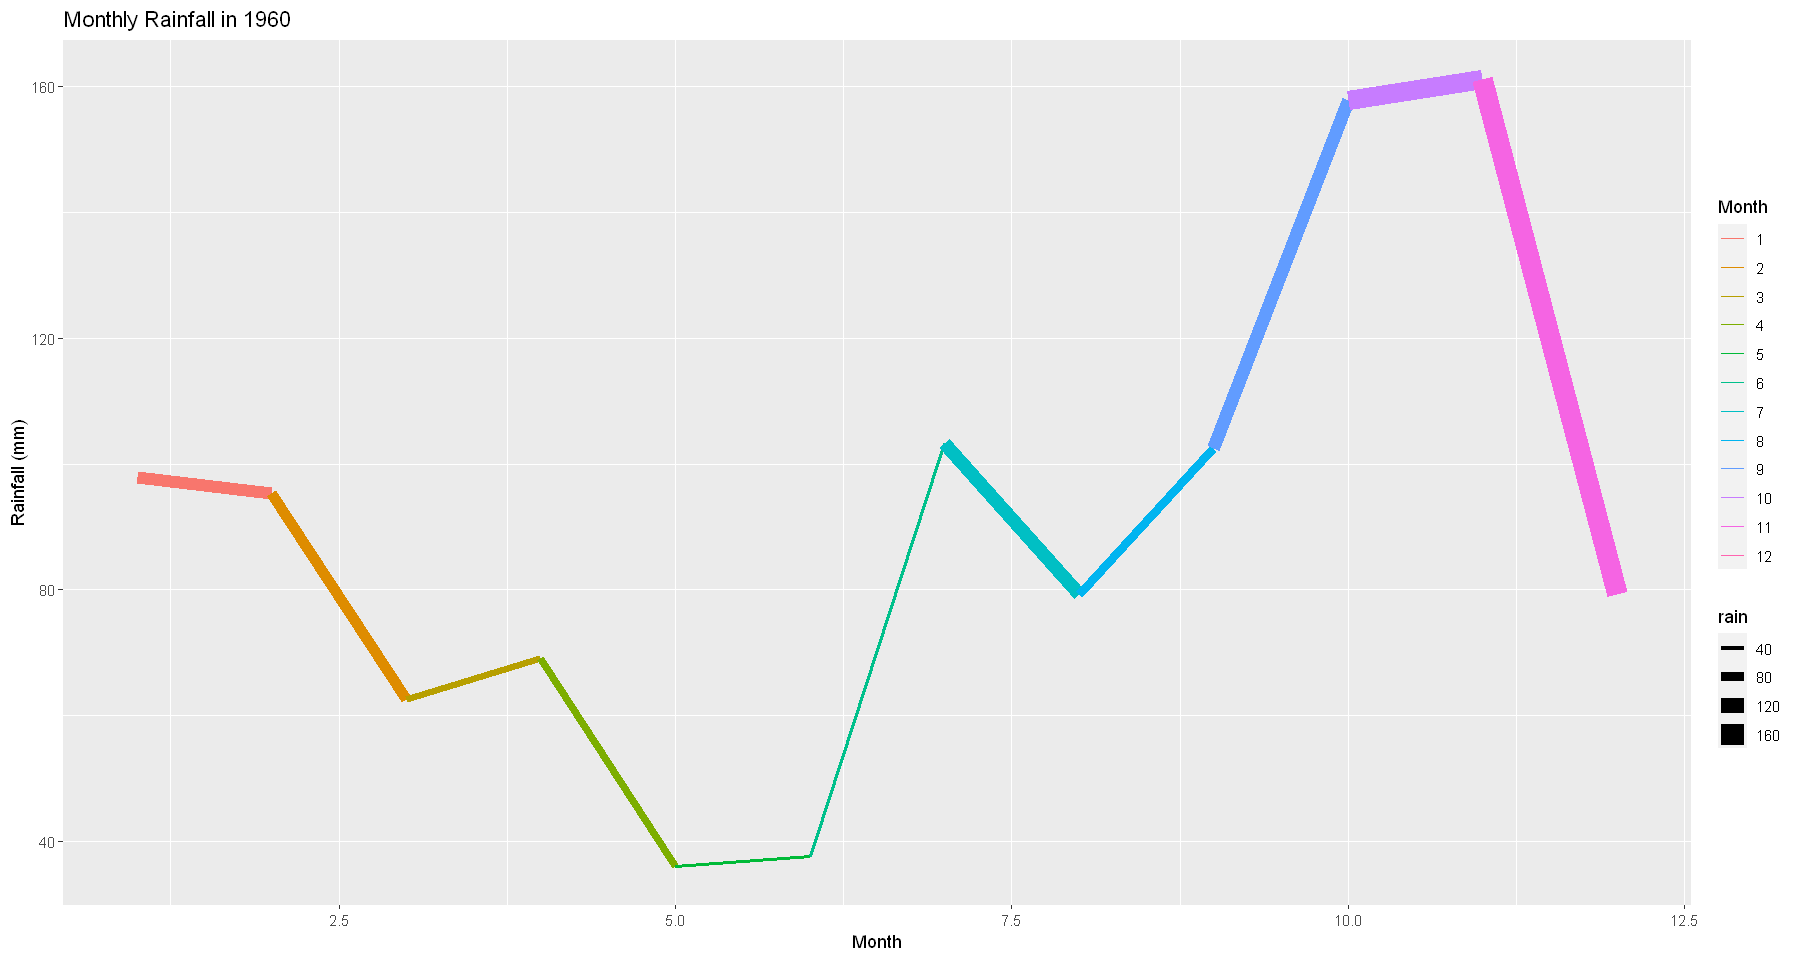

In [8]:
# Filter the data to include only observations from a single year
year_data <- subset(data, year == 1960)

# Create a line chart of the monthly rainfall with color and linewidth parameters
ggplot(year_data, aes(x = month, y = rain, color = factor(month), group = 1)) + 
  geom_line(aes(linewidth = rain)) +
  scale_color_discrete(name = "Month") +
  labs(title = "Monthly Rainfall in 1960",
       x = "Month",
       y = "Rainfall (mm)")

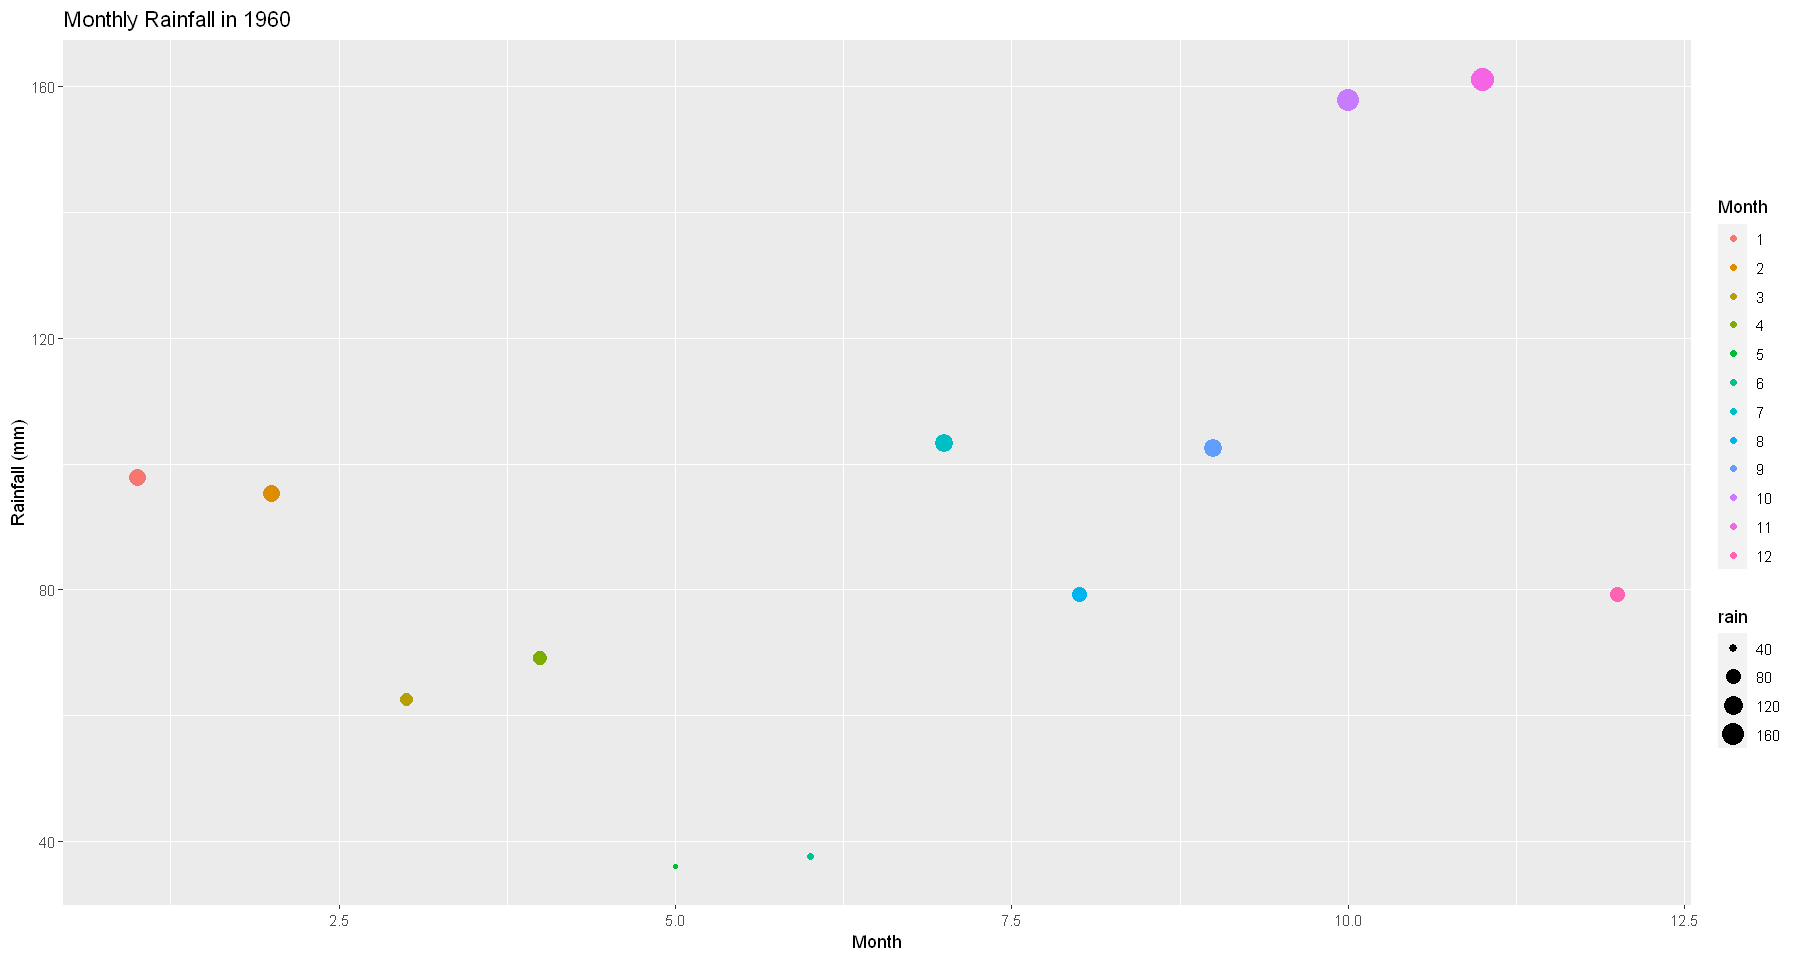

In [9]:
# Filter the data to include only observations from 1960
year_data <- subset(data, year == 1960)

# Create a point chart of the monthly rainfall with color and size parameters
ggplot(year_data, aes(x = month, y = rain, color = factor(month), size = rain)) +
  geom_point() +
  scale_color_discrete(name = "Month") +
  labs(title = "Monthly Rainfall in 1960",
       x = "Month",
       y = "Rainfall (mm)")

In [10]:
# Convert the month column to month names
data_edited <- data %>%
  mutate(month = month.name[month])

head(data_edited)

,year,month,ind,rain,gdf,rd,wd
,<int>,<chr>,<int>,<dbl>,<dbl>,<int>,<int>
1,1956,January,8,NA,NA,NA,NA
2,1956,February,8,NA,NA,NA,NA
3,1956,March,8,NA,NA,NA,NA
4,1956,April,8,NA,NA,NA,NA
5,1956,May,8,NA,NA,NA,NA
6,1956,June,8,NA,NA,NA,NA


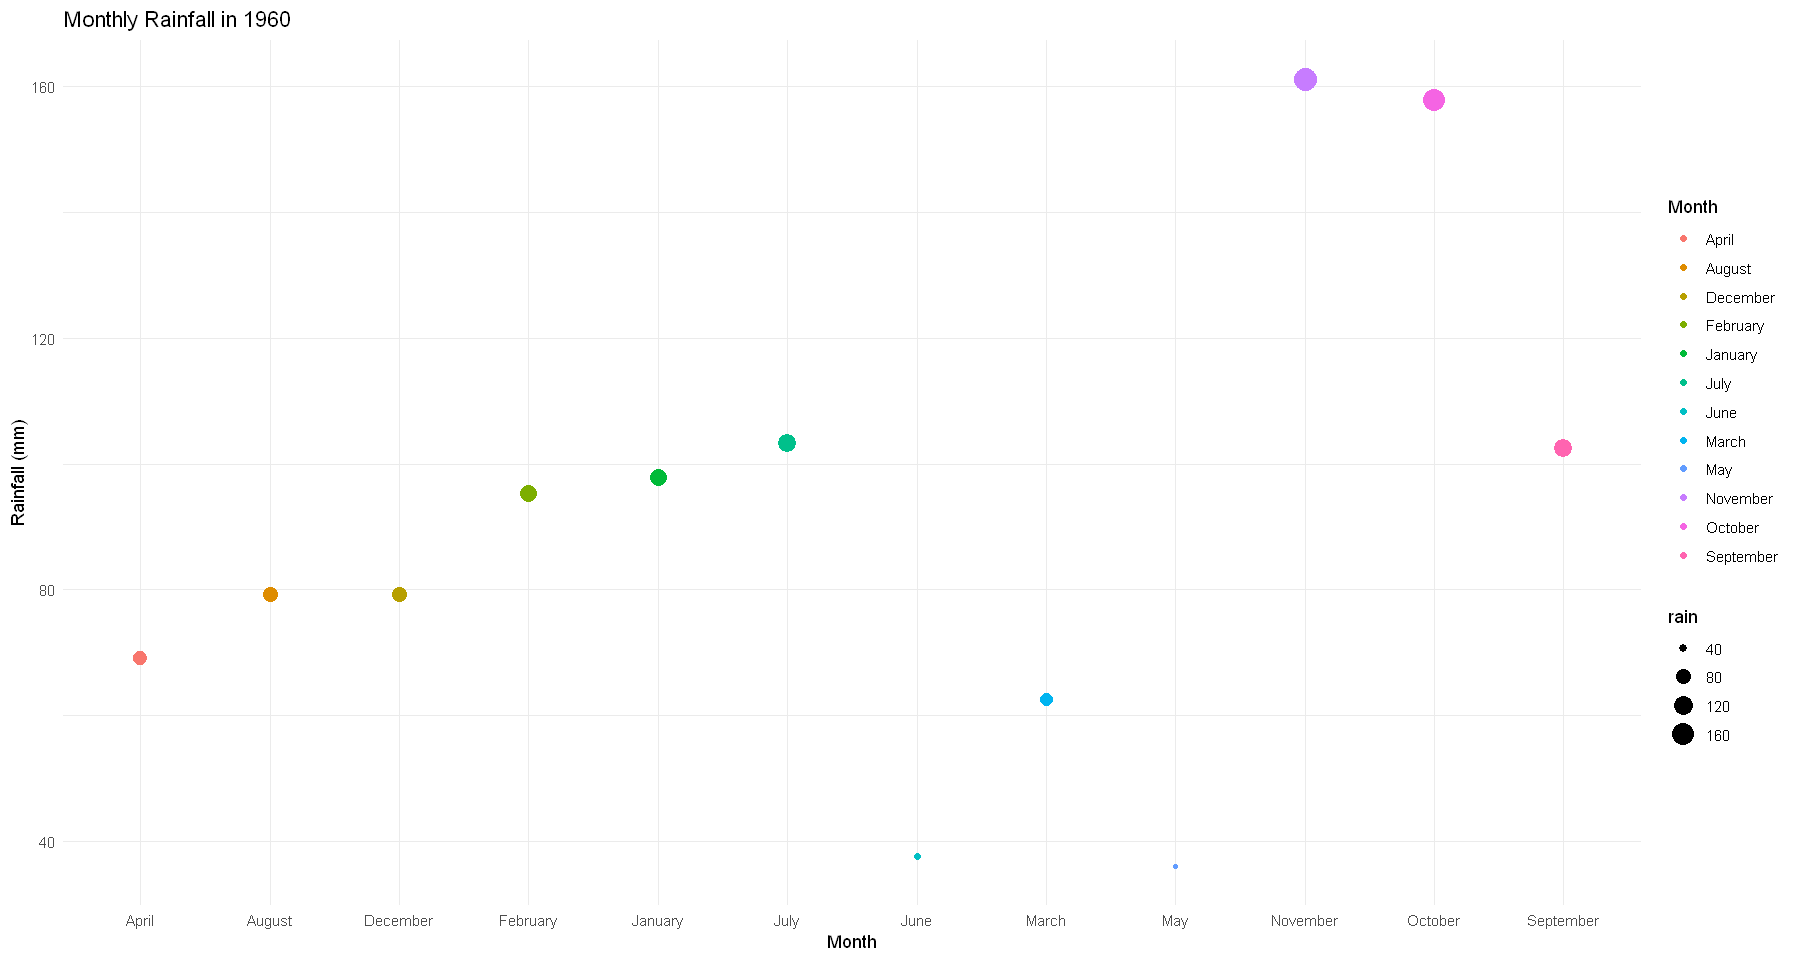

In [11]:
# Filter the data to include only observations from 1960
year_data <- subset(data_edited, year == 1960)

# Create a point chart of the monthly rainfall with color and size parameters and apply the theme
ggplot(year_data, aes(x = month, y = rain, color = factor(month), size = rain)) +
  geom_point() +
  scale_color_discrete(name = "Month") +
  labs(title = "Monthly Rainfall in 1960",
       x = "Month",
       y = "Rainfall (mm)") +
  theme_minimal()

## 5. When you are happy with your geom_point() chart, animate it.
- Load gganimate.  If you haven't already installed it, do that first, then comment out the install and just load it using library().
- Copy the cell from your last successful point chart.  This time, don't limit the dataset to a year, but use the year column to animate the chart.  If you are animating by a column named YR:
- Add   transition_time(YR)  term
- Make sure the title or subtitle includes Year: {frame_time}
- Save the latest animation, using anim_save (see sample code, week 4), giving the file a name (e.g. week4.gif)
- display the gif using - display_gif("week4.gif")

In [18]:
data_filtered <- na.omit(data_edited)

# Create a point chart of the monthly rainfall with color and size parameters and apply the animation
p <- ggplot(data_filtered, aes(x = month, y = rain, color = factor(month), size = rain)) +
  geom_point() +
  scale_color_discrete(name = "Month") +
  labs(title = "Monthly Rainfall by Year",
       x = "Month",
       y = "Rainfall (mm)") +
  transition_time(year)

# Animate the chart and set the animation parameters
animate(p, fps = 10, duration = 10, width = 800, height = 600)


Warning message:
"file_renderer failed to copy frames to the destination directory"


[1] "./gganim_plot0001.png" "./gganim_plot0002.png" "./gganim_plot0003.png"
  [4] "./gganim_plot0004.png" "./gganim_plot0005.png" "./gganim_plot0006.png"
  [7] "./gganim_plot0007.png" "./gganim_plot0008.png" "./gganim_plot0009.png"
 [10] "./gganim_plot0010.png" "./gganim_plot0011.png" "./gganim_plot0012.png"
 [13] "./gganim_plot0013.png" "./gganim_plot0014.png" "./gganim_plot0015.png"
 [16] "./gganim_plot0016.png" "./gganim_plot0017.png" "./gganim_plot0018.png"
 [19] "./gganim_plot0019.png" "./gganim_plot0020.png" "./gganim_plot0021.png"
 [22] "./gganim_plot0022.png" "./gganim_plot0023.png" "./gganim_plot0024.png"
 [25] "./gganim_plot0025.png" "./gganim_plot0026.png" "./gganim_plot0027.png"
 [28] "./gganim_plot0028.png" "./gganim_plot0029.png" "./gganim_plot0030.png"
 [31] "./gganim_plot0031.png" "./gganim_plot0032.png" "./gganim_plot0033.png"
 [34] "./gganim_plot0034.png" "./gganim_plot0035.png" "./gganim_plot0036.png"
 [37] "./gganim_plot0037.png" "./gganim_plot0038.png" "./gganim_plot0039.png"
 [40] "./gganim_plot0040.png" "./gganim_plot0041.png" "./gganim_plot0042.png"
 [43] "./gganim_plot0043.png" "./gganim_plot0044.png" "./gganim_plot0045.png"
 [46] "./gganim_plot0046.png" "./gganim_plot0047.png" "./gganim_plot0048.png"
 [49] "./gganim_plot0049.png" "./gganim_plot0050.png" "./gganim_plot0051.png"
 [52] "./gganim_plot0052.png" "./gganim_plot0053.png" "./gganim_plot0054.png"
 [55] "./gganim_plot0055.png" "./gganim_plot0056.png" "./gganim_plot0057.png"
 [58] "./gganim_plot0058.png" "./gganim_plot0059.png" "./gganim_plot0060.png"
 [61] "./gganim_plot0061.png" "./gganim_plot0062.png" "./gganim_plot0063.png"
 [64] "./gganim_plot0064.png" "./gganim_plot0065.png" "./gganim_plot0066.png"
 [67] "./gganim_plot0067.png" "./gganim_plot0068.png" "./gganim_plot0069.png"
 [70] "./gganim_plot0070.png" "./gganim_plot0071.png" "./gganim_plot0072.png"
 [73] "./gganim_plot0073.png" "./gganim_plot0074.png" "./gganim_plot0075.png"
 [76] "./gganim_plot0076.png" "./gganim_plot0077.png" "./gganim_plot0078.png"
 [79] "./gganim_plot0079.png" "./gganim_plot0080.png" "./gganim_plot0081.png"
 [82] "./gganim_plot0082.png" "./gganim_plot0083.png" "./gganim_plot0084.png"
 [85] "./gganim_plot0085.png" "./gganim_plot0086.png" "./gganim_plot0087.png"
 [88] "./gganim_plot0088.png" "./gganim_plot0089.png" "./gganim_plot0090.png"
 [91] "./gganim_plot0091.png" "./gganim_plot0092.png" "./gganim_plot0093.png"
 [94] "./gganim_plot0094.png" "./gganim_plot0095.png" "./gganim_plot0096.png"
 [97] "./gganim_plot0097.png" "./gganim_plot0098.png" "./gganim_plot0099.png"
[100] "./gganim_plot0100.png"
attr(,"frame_vars")
    frame nframes progress frame_time
1       1     100     0.01       1956
2       2     100     0.02       1957
3       3     100     0.03       1957
4       4     100     0.04       1958
5       5     100     0.05       1958
6       6     100     0.06       1959
7       7     100     0.07       1959
8       8     100     0.08       1960
9       9     100     0.09       1960
10     10     100     0.10       1961
11     11     100     0.11       1961
12     12     100     0.12       1962
13     13     100     0.13       1962
14     14     100     0.14       1963
15     15     100     0.15       1963
16     16     100     0.16       1964
17     17     100     0.17       1964
18     18     100     0.18       1965
19     19     100     0.19       1965
20     20     100     0.20       1966
21     21     100     0.21       1967
22     22     100     0.22       1967
23     23     100     0.23       1968
24     24     100     0.24       1968
25     25     100     0.25       1969
26     26     100     0.26       1969
27     27     100     0.27       1970
28     28     100     0.28       1970
29     29     100     0.29       1971
30     30     100     0.30       1971
31     31     100     0.31       1972
32     32     100     0.32       1972
33     33     100     0.33       1973
34     34     100     0.34       1973
35     35     100     0.35       1974
36     36 

ERROR: Error: The animation object does not specify a save_animation method


## 6. Install and load the streamgraph package 
 - Copy the code from https://hrbrmstr.github.io/streamgraph/
 - Adapt the code, to show names around your own name.

With a new dataset:
- Read in the "vaccine-preventable-disease-cases-by-county-and-year-2.csv"
- Generate a streamgraph showing vaccinations across the years
    - You can decide on the breakdown of what is displayed.


In [13]:
# Set the working directory to the folder where the file is located
setwd("C:/Users/lukeh/Documents/College/4th-Year/Visualising_Data")

# Install and load the necessary packages
# install.packages("readr")   # If not already installed
library(readr)

# Read in the file
vaccine_data <- read_csv("vaccine-preventable-disease-cases-by-county-and-year-2.csv")

head(vaccine_data)

Rows: 8319 Columns: 4
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (2): disease, county
dbl (2): year, count

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


disease,county,year,count
<chr>,<chr>,<dbl>,<dbl>
Diphtheria,Alameda,2001,0
Diphtheria,Alameda,2002,0
Diphtheria,Alameda,2003,0
Diphtheria,Alameda,2004,0
Diphtheria,Alameda,2005,0
Diphtheria,Alameda,2006,0


In [14]:
# Aggregate the data by year and sum the number of vaccinations
vaccine_year <- vaccine_data %>% 
  group_by(year) %>% 
  summarize(vaccinations = sum(count)) 

# Convert the data to long format
vaccine_long <- vaccine_year %>% 
  pivot_longer(cols = vaccinations, names_to = "vaccination_type", values_to = "count")

In [17]:
library(htmltools)

# Aggregate the data by year and sum the number of vaccinations
vaccine_year <- vaccine_data %>% 
  group_by(year) %>% 
  summarize(vaccinations = sum(count)) 

# Convert the data to long format
vaccine_long <- vaccine_year %>% 
  pivot_longer(cols = vaccinations, names_to = "vaccination_type", values_to = "count")

# Create the streamgraph and wrap it in an HTML object
streamgraph_output <- HTML(streamgraph(vaccine_long, key = "vaccination_type", value = "count", date = "year", interpolate = "basis", width = 1000, height = 500))

# Display the streamgraph
streamgraph_output

ERROR: Error in FUN(X[[i]], ...): argument is not a character vector
